# Exploring the Relationship Between Movie Genres and Gross Domestic Revenue

For our first business insight, we will be researching and exploring how genre affects domestic revenue. This is relevant as very costly resources are allocated to creating movies and it is important to understand what genres perform the best prior to making a decision as to what kind of movies Computing Vision will make. Let's start by taking a look at our movie data.

<img src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2022/05/movie_theater_1400.jpg?w=1400&ssl=1" width=500>

Image Source: https://news.northeastern.edu/2022/05/26/movie-theater-hearing-damage/

By Alivia and Vaia

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import sqrt
%matplotlib inline


In [3]:
# connect to sqlite database to import data and view genres of movies
conn = sqlite3.connect("../../zippedData/im.db")
imbd = pd.read_sql('''
SELECT *
FROM movie_basics

''', conn)

In [4]:
# preview data
imbd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# view data cleanliness and null values
imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# import csv with domestic revenue and preview data
revenue_df = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")
revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# rename column with movie title to prepare for pandas join
revenue_df.rename(columns={'movie': 'primary_title'}, inplace=True)
revenue_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# create new dataframe including genre, domestic revenue, and  movie title
movies1 = pd.merge(imbd, revenue_df, on ='primary_title')
movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   id                 3815 non-null   int64  
 7   release_date       3815 non-null   object 
 8   production_budget  3815 non-null   object 
 9   domestic_gross     3815 non-null   object 
 10  worldwide_gross    3815 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 357.7+ KB


In [9]:
# drop rows with genre value as null
movies = movies1.dropna(subset= ['genres'])
movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"


In [10]:
# create column which contains just one genre instead of a list of genres
movies['main_genre'] = movies["genres"].str.split(',')
movies_df = movies.explode('main_genre')

<ipython-input-10-eb6c512f8464>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['main_genre'] = movies["genres"].str.split(',')


In [11]:
# dropping duplicates 
movies_df = movies_df.drop_duplicates(subset= ['movie_id'])

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3539 non-null   object 
 1   primary_title      3539 non-null   object 
 2   original_title     3539 non-null   object 
 3   start_year         3539 non-null   int64  
 4   runtime_minutes    3133 non-null   float64
 5   genres             3539 non-null   object 
 6   id                 3539 non-null   int64  
 7   release_date       3539 non-null   object 
 8   production_budget  3539 non-null   object 
 9   domestic_gross     3539 non-null   object 
 10  worldwide_gross    3539 non-null   object 
 11  main_genre         3539 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 359.4+ KB


In [13]:
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706",Action
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227",Action
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",Comedy
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",Adventure
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008","$2,500,000","$174,255","$174,255",Documentary
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907",Crime
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226",Action
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004","$40,000,000","$75,305,995","$124,823,094",Crime


In [14]:
# make domestic gross into integer without dollar sign
def clean_dollar(df, column):
    df[column] = df[column].str.strip('$')
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype(int)
    return df[column]

clean_dollar(movies_df,'domestic_gross')

0              0
1       70433227
3        1109808
4         720828
5         720828
          ...   
3810      174255
3811    12592907
3812    23530831
3813    75305995
3814           0
Name: domestic_gross, Length: 3539, dtype: int32

In [49]:
# sort data frame to ensure that the visualization is in order
sorted_movies_df = movies_df.sort_values(['main_genre','domestic_gross'], ascending=True)
sorted_movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",0,"$73,706",Action
108,tt4706780,Red Dog,Pyos Ryzhiy,2016,99.0,"Action,Drama,History",67,"Dec 31, 2011","$9,100,000",0,"$20,927,794",Action
110,tt8035272,Red Dog,Red Dog,2018,NaN,"Action,Drama,History",67,"Dec 31, 2011","$9,100,000",0,"$20,927,794",Action
164,tt0923653,The Dead Undead,The Dead Undead,2010,89.0,"Action,Horror,Sci-Fi",7,"Dec 31, 2010","$1,100,000",0,$0,Action
369,tt10329842,Geroy,Geroy,2019,NaN,Action,65,"Dec 31, 2015","$7,000,000",0,"$1,545,121",Action


In [63]:
total_action = sorted_movies_df[(sorted_movies_df['main_genre'] == 'Horror')]
max(total_action['domestic_gross'])

760507625

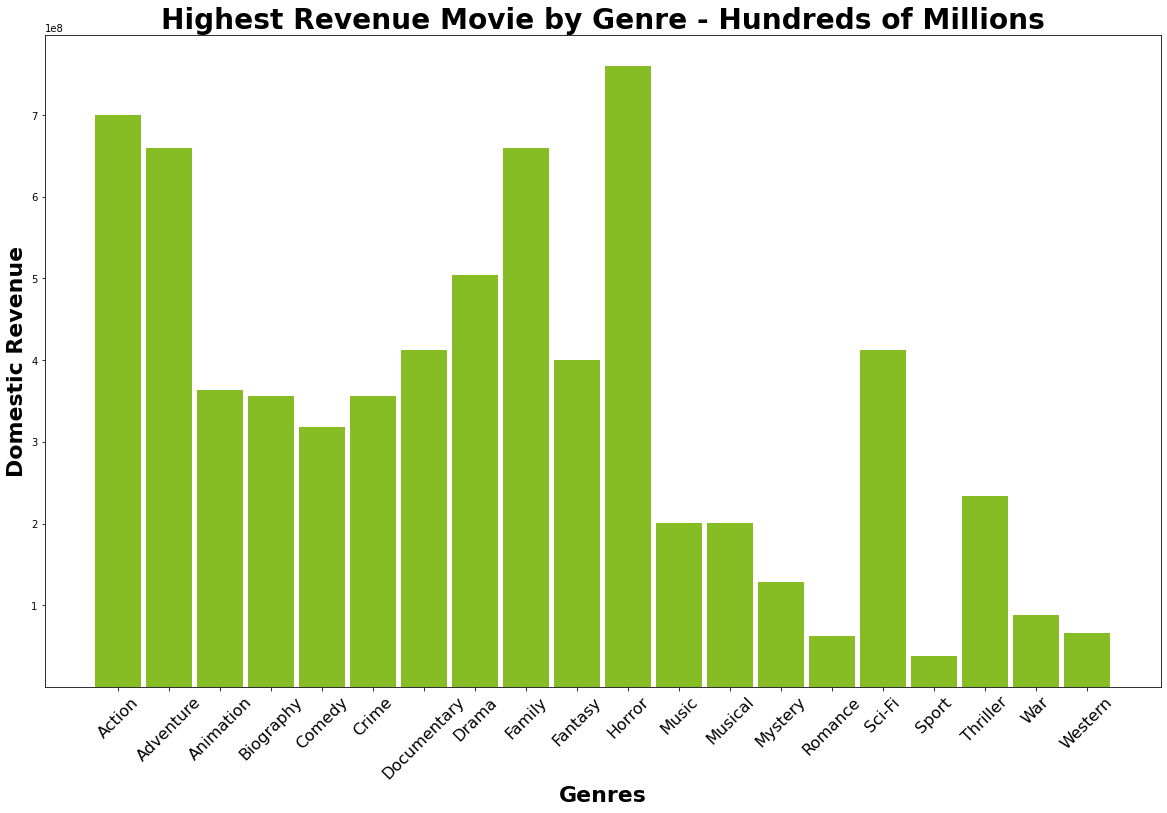

In [66]:
# plot genre in relation to revenue - this visualization excludes outliers

plt.figure(figsize=(20,12))

plt.bar(sorted_movies_df['main_genre'], sorted_movies_df["domestic_gross"], width=0.9, bottom=0.2, color='#86BC24')

plt.xlabel('Genres', fontsize=22, fontweight='bold')
plt.ylabel('Domestic Revenue', fontsize = 22, fontweight='bold')
plt.xticks(rotation='45', fontsize = 16)


plt.title('Highest Revenue Movie by Genre - Hundreds of Millions', fontsize = 28, fontweight='bold')


plt.show()


# Visualization Analysis: Bar Plot
According to our bar plot, the genres with the greatest performing movies in terms of gross domestic revenue are of the horror, action, family, and adventure genres. It is to be noted that often times action, family, and adventure movies are typically marketed towards and consumed by a wider group of people due to age appropriate ratings as opposed to horror, which is often times rated PG-13 or R and cannot be seen by a large group of people. This notion will guide our hypothesis test that is later to come.

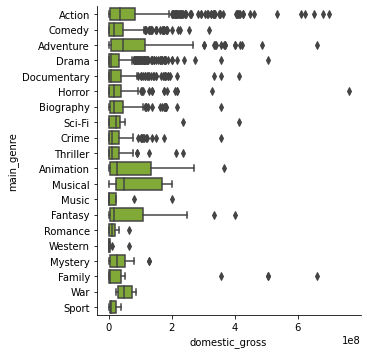

In [67]:
sns.catplot(data=movies_df, x="domestic_gross", y="main_genre", kind="box", color='#86BC24')

# Visualization Analysis: Box Plot
According to our boxplot, we can see several outliers beyond the cohorts exist in the action and adventure categories, meaning these genres have several movies that performed extremely well compared to other movies. Note that horror films have less outliers than the other genres as well as smaller measures of central tendency than animation, adventure, action, and musical genres. Let's see what those top grossing movies are called.

In [17]:
top_action = movies_df[(movies_df['main_genre'] == 'Action') & (movies_df['domestic_gross'] > 600000000)]
top_action

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
12,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015","$215,000,000",652270625,"$1,648,854,864",Action
141,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012","$225,000,000",623279547,"$1,517,935,897",Action
1835,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018","$200,000,000",700059566,"$1,348,258,224",Action
3218,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44,"Jun 15, 2018","$200,000,000",608581744,"$1,242,520,711",Action
3360,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018","$300,000,000",678815482,"$2,048,134,200",Action


### Superheroes
All but one of our top 5 action movies are about superheroes, two were a part of the same saga, Avengers, and two of them are sequels to very successful movies. This says a lot about the cinema audience. What about our greatest value, the horror film as shown in the box plot?

In [18]:
top_horror = movies_df[(movies_df['main_genre'] == 'Horror') & (movies_df['domestic_gross'] > 600000000)]
top_horror

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,main_genre
1747,tt1775309,Avatar,Abatâ,2011,93.0,Horror,1,"Dec 18, 2009","$425,000,000",760507625,"$2,776,345,279",Horror


The top grossing movie of this entire dataset is Avatar at over $2.7 billion! Classified as a horror movie in our dataset, it is considered to be a dystopian action movie. 

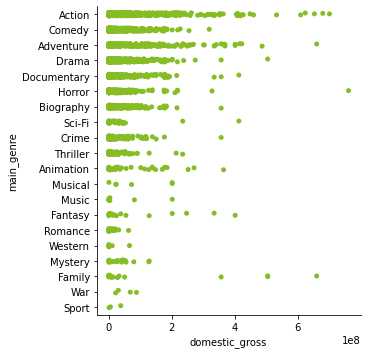

In [68]:
cp = sns.catplot(data=movies_df, x="domestic_gross", y="main_genre", color='#86BC24')

# Visualization Analysis: Categorical Plot
Our categorical plot differs from the previous two graphs, depicting action as the most successful movie genre in terms of gross domestic revenue, followed by adventure, and the horror genre looks like it pulls in much less.


# Hypothesis Test: Best Movie Genre?
We hypothesize that the movies which are classified as action have a higher gross revenue than other genres as it is typically a more family-friendly genre. 

## Null: Action movies have a lower or equal average gross domestic revenue than the rest of movies 


## Alternative: Action movies have a significantly greater gross domestic revenue than the rest of movies

We will be conducting a one sample z-test at the alpha level of 0.05 to compare the mean gross revenue of action movies versus the mean gross revenue of all movies, to see if this genre sticks out as more successful than others. 

In [42]:
a = 0.05
a

0.05

In [27]:
mu = movies_df['domestic_gross'].mean() # population mean
mu

40874293.98954507

In [28]:
sigma = movies_df['domestic_gross'].std() # population standard deviation
sigma

71722959.89199439

In [29]:
n = len(movies_df[movies_df['main_genre'] == 'Action']) # sample size
n

667

In [30]:
# query domestic gross for just action movies and store it into variable to calculate 'sample' mean
sample_action = movies_df.query("main_genre == 'Action'")['domestic_gross']
sample_action

0               0
1        70433227
11       26017685
12      652270625
18       73058679
          ...    
3760     30376755
3763            0
3778     55591409
3802     57806952
3812     23530831
Name: domestic_gross, Length: 667, dtype: int32

In [25]:
x_bar = sample_action.mean() # sample mean
x_bar

67877437.011994

In [33]:
# calculcate the test statistic
z = (x_bar - mu)/(sigma/sqrt(n))
z

9.723419649917899

In [40]:
# calculate the p-value
p = 1 - stats.norm.cdf(z)
p

0.0

In [43]:
# interpret our p-value in terms of our alpha level 
# Is there is a statistically significant difference?
# Can we reject the null hypothesis?
p < a

True

Our p-value is less than the alpha so we must reject the null hypothesis!

## Hypothesis Test Results 
### We reject the null and conclude that action movies have a significantly greater gross domestic revenue than the rest of movies!

Taking this into consideration, we make the suggestion that the studio should focus on creating action movies in order to maximize revenue.

<img src="https://assets.simpleviewinc.com/simpleview/image/upload/c_fill,h_805,q_50,w_1903/v1/clients/eauclaire-redesign/2da0fb8c_23a4_430a_b852_abb92a27f8b0_1d053ad0-78ed-4dc2-8fb2-47f6160893e8.jpg" width=500>

Image Source: https://www.visiteauclaire.com/things-to-do/arts/cinemas/